In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


/Users/devanshu/Desktop/exploring-langgraph/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
class bmiState(TypedDict):
    weight: float  # in kg
    height: float  # in meters
    bmi : float  # Body Mass Index
    category: str  # BMI category

In [5]:
def bmi_calculator(state: bmiState) -> bmiState:
    weight = state['weight']
    height = state['height']

    # Calculate BMI
    bmi = weight / (height ** 2)
    state['bmi'] = bmi

    return state

def bmi_category(state: bmiState) -> bmiState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    
    return state

In [6]:
graph = StateGraph(bmiState)

graph.add_node("bmi_calculator", bmi_calculator)
graph.add_node("bmi_category", bmi_category)

graph.add_edge(START, 'bmi_calculator')
graph.add_edge('bmi_calculator', 'bmi_category')
graph.add_edge('bmi_category', END)

workflow = graph.compile()

initial_state = bmiState(weight=70.0, height=1.75, bmi=0.0, category='')
final_state = workflow.invoke(initial_state)

print("Final State:", final_state)


Final State: {'weight': 70.0, 'height': 1.75, 'bmi': 22.857142857142858, 'category': 'Normal weight'}


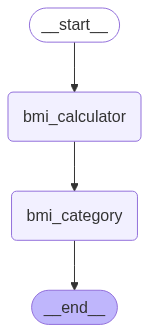

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
